<a href="https://colab.research.google.com/github/Philocreation/My_Deep_learning/blob/main/Template/template_attribute_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 속성 데이터 회귀/분류/2진 분류 Template

# 데이터 준비 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
!wget https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/car_classification.csv

--2022-01-06 04:10:26--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/car_classification.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54766 (53K) [text/plain]
Saving to: ‘car_classification.csv’

car_classification. 100%[===================>]  53.48K  --.-KB/s    in 0.003s  

2022-01-06 04:10:26 (15.0 MB/s) - ‘car_classification.csv’ saved [54766/54766]



In [ ]:
data = pd.read_csv('car_classification.csv')
data.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,class
0,-0.697747,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,0
1,-1.082115,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,0
2,-0.697747,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,0
3,-0.953992,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,0
4,-0.825870,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,0
5,-1.082115,1.482053,2.241772,2.429924,1.605147,-2.008554,-1.623241,0
6,-1.210238,1.482053,2.480677,3.001484,1.620452,-2.371022,-1.623241,0
7,-1.210238,1.482053,2.346890,2.871584,1.571005,-2.552256,-1.623241,0
8,-1.210238,1.482053,2.490234,3.131384,1.704040,-2.008554,-1.623241,0
9,-1.082115,1.482053,1.869080,2.222085,1.027093,-2.552256,-1.623241,0


In [ ]:
np_data = data.to_numpy()
np.random.shuffle(np_data)

x = np_data[:,:7]
y = np_data[:,7]

i = int(len(x)*0.8)
train_x, test_x = x[:i], x[i:]
train_y, test_y = y[:i], y[i:]

In [ ]:
print(y[0])

2.0


In [ ]:
print(train_x[:5])
print(train_y[:5])

[[ 1.09597353 -0.86291079 -0.48174752 -0.22003462 -0.36800476 -0.59492837
   1.63432105]
 [-1.08211534  1.48205303  1.86907996  2.22208456  1.02709346 -2.55225565
  -1.6232409 ]
 [ 0.96785066 -0.86291079 -0.72065276 -0.5837545  -0.30325336  1.39864571
   1.63432105]
 [-0.69774672  0.30957112  0.29230543 -0.24601461  0.95056909  1.25365851
  -0.26592342]
 [-1.3383611   1.48205303  1.07591459  0.66328508  1.31906339 -0.55868157
  -1.08031391]]
[2. 0. 0. 0. 0.]


In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(313, 7)
(313,)
(79, 7)
(79,)


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import tensorflow as tf 

from tensorflow import keras 
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense 

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(7,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation="softmax"))


# 예측 : model.compile(optimizer="SGD",  loss="mse", metrics=["mape"])
# 분류 : model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
# 2진 분류 : model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["acc,"AUC", Precision(), Recall()])
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                80        
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 3)                 33        
                                                                 
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________


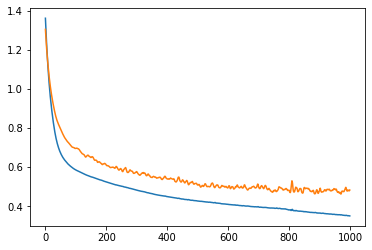

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)

3/3 [==============================] - 0s 3ms/step - loss: 0.4686 - acc: 0.8101
loss= 0.46857210993766785
acc= 0.8101266026496887


In [ ]:
print(test_x.shape)
print(test_x)

(79, 7)
[[-6.97746719e-01  1.48205303e+00  1.18103289e+00  1.18288491e+00
   5.39692059e-01 -1.64608561e+00 -1.62324090e+00]
 [ 1.40346843e+00 -8.62910793e-01 -9.21333150e-01 -1.02541435e+00
  -1.09792957e+00  2.38748065e-01  1.36285755e+00]
 [-6.97746719e-01  3.09571117e-01  5.31210658e-01 -6.87674463e-01
   7.02159193e-01  1.97859454e+00  5.54007134e-03]
 [-8.25869594e-01  3.09571117e-01  3.49642682e-01  1.43685258e-01
   1.09419945e+00  1.97859454e+00 -2.65923425e-01]
 [ 7.09905319e-02 -8.62910793e-01 -5.77309617e-01 -2.20034620e-01
  -3.24444729e-01 -7.39915575e-01 -2.65923425e-01]
 [-6.97746719e-01  3.09571117e-01  3.59198891e-01 -1.16114655e-01
  -2.22019797e-01 -1.96213553e-01 -8.08850416e-01]
 [ 1.49315445e+00 -8.62910793e-01 -1.08378871e+00 -1.15531431e+00
  -1.43345952e+00  2.02501263e-01  1.36285755e+00]
 [-7.36183582e-01  3.09571117e-01  3.49642682e-01  1.57258478e+00
   5.50287741e-01 -7.76162376e-01  5.48467063e-01]
 [ 1.28815785e+00 -8.62910793e-01 -9.21333150e-01 -5.577

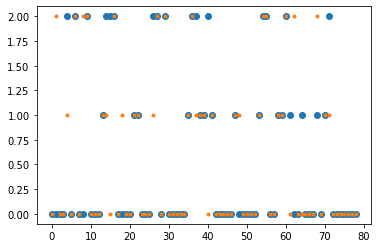

In [ ]:
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y, "o")
plt.plot(predicted, ".")
plt.show()